In [4]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-on Activity 17.2: Density estimation via Gaussian mixtures

## Objectives

+ To demonstrate density estimation via Gaussian mixtures

In [48]:
# Make synthetic dataset for clustering
num_clusters_true = 3
# The means of each cluster
mu_true = 5.0 * np.random.randn(num_clusters_true, 2)
# The variance of the observations around the cluster
# Covariance of each cluster
Sigmas = []
for i in range(num_clusters_true):
    u = 0.5 * np.random.randn(2, 1)
    v = 0.5 * np.random.randn(2, 1)
    Sigma = np.dot(u, u.T) + np.dot(v, v.T)
    Sigmas.append(Sigma)
# How many observations to generate per cluster
num_obs_cluster = [50, 50, 50]
#num_obs_cluster = [50] * num_clusters_true
# Generate the data
data = []
for i in range(num_clusters_true):
    x_i = np.random.multivariate_normal(mu_true[i], Sigmas[i], 
                                        size=num_obs_cluster[i])
    data.append(x_i)
data = np.vstack(data)
# Permute the data so that order info is lost
data = np.random.permutation(data)

Text(0, 0.5, '$x_2$')

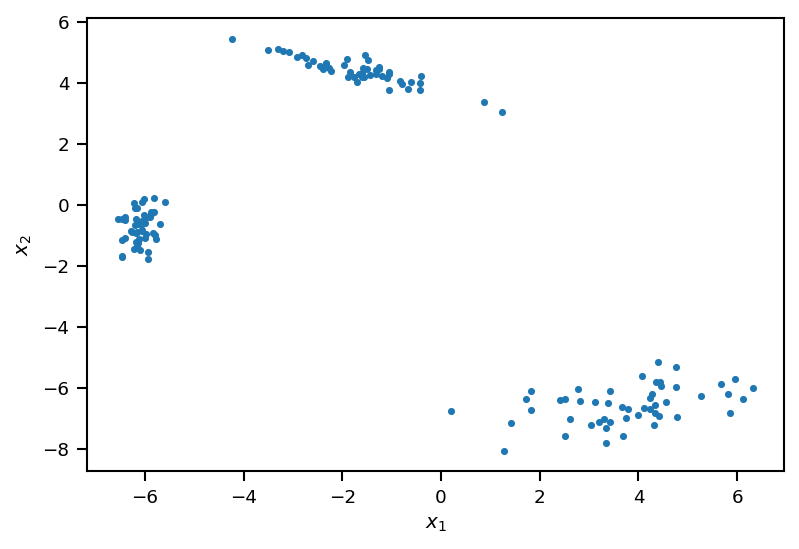

In [49]:
fig, ax = plt.subplots(dpi=150)
ax.plot(data[:, 0], data[:, 1], '.')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

In [51]:
from sklearn.mixture import GaussianMixture

In [53]:
model = GaussianMixture(n_components=3).fit(data)

In [54]:
model.means_

array([[ 3.76519065, -6.56787742],
       [-1.70288415,  4.39686925],
       [-6.09405932, -0.7255382 ]])

In [56]:
mu_true

array([[ 3.80444144, -6.44341165],
       [-2.03672129,  4.4897276 ],
       [-6.06477761, -0.77098006]])

In [57]:
model.covariances_

array([[[ 1.70999457,  0.33258424],
        [ 0.33258424,  0.37287083]],

       [[ 1.03771803, -0.3989088 ],
        [-0.3989088 ,  0.19028675]],

       [[ 0.04485602,  0.02668511],
        [ 0.02668511,  0.25548411]]])

Text(0, 0.5, '$x_2$')

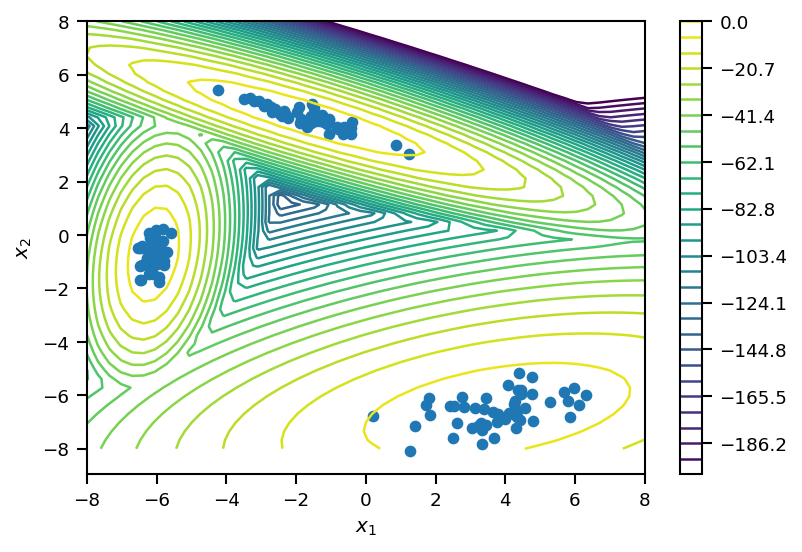

In [75]:
x = np.linspace(-8., 8.)
y = np.linspace(-8., 8.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = model.score_samples(XX)
Z = Z.reshape(X.shape)

fig, ax = plt.subplots(dpi=150)
c = ax.contour(X, Y, Z, levels=np.linspace(-200, 0.0, 30))
plt.colorbar(c)
plt.scatter(data[:, 0], data[:, 1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

Text(0, 0.5, '$x_2$')

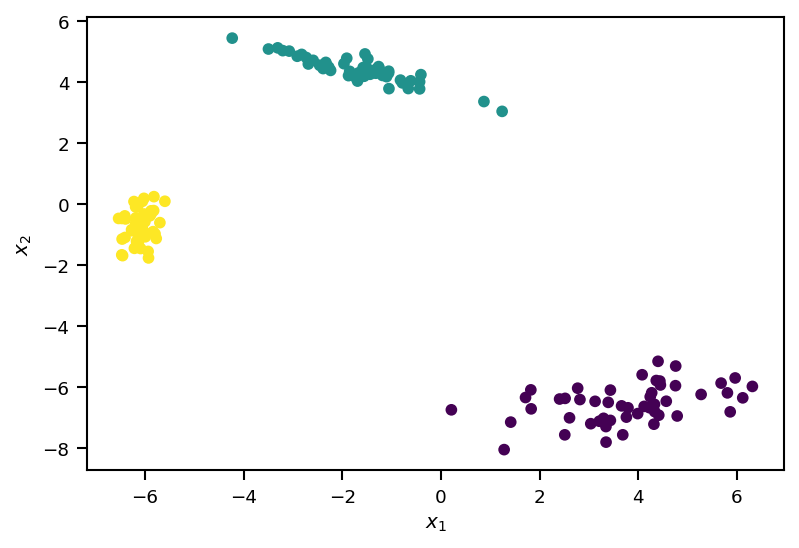

In [76]:
# Clustering with this model
labels = model.predict(data)
fig, ax = plt.subplots(dpi=150)
plt.scatter(data[:, 0], data[:, 1], c=labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

Text(0, 0.5, '$x_2$')

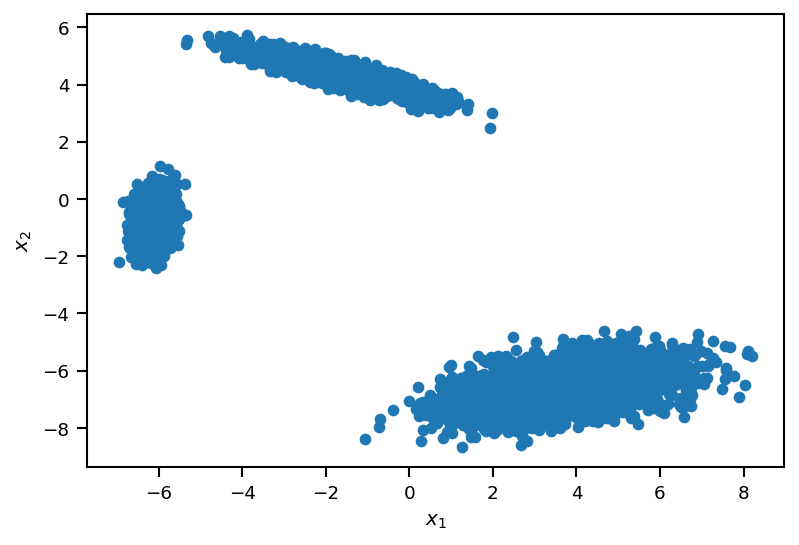

In [83]:
# Sampling from the density
fig, ax = plt.subplots(dpi=150)
s_data, labels = model.sample(10000)
ax.scatter(s_data[:, 0], s_data[:, 1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

Text(0, 0.5, '$x_2$')

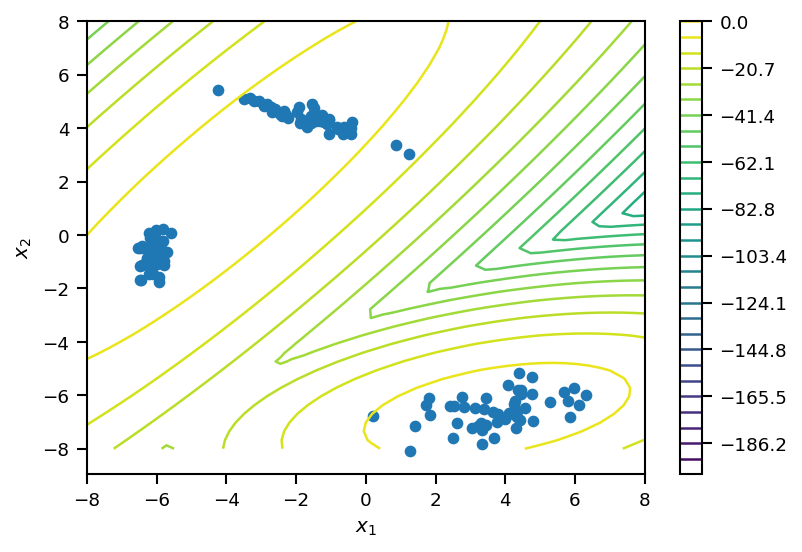

In [84]:
# Trying fewer components
model = GaussianMixture(n_components=2).fit(data)
x = np.linspace(-8., 8.)
y = np.linspace(-8., 8.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = model.score_samples(XX)
Z = Z.reshape(X.shape)

fig, ax = plt.subplots(dpi=150)
c = ax.contour(X, Y, Z, levels=np.linspace(-200, 0.0, 30))
plt.colorbar(c)
plt.scatter(data[:, 0], data[:, 1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

Text(0, 0.5, '$x_2$')

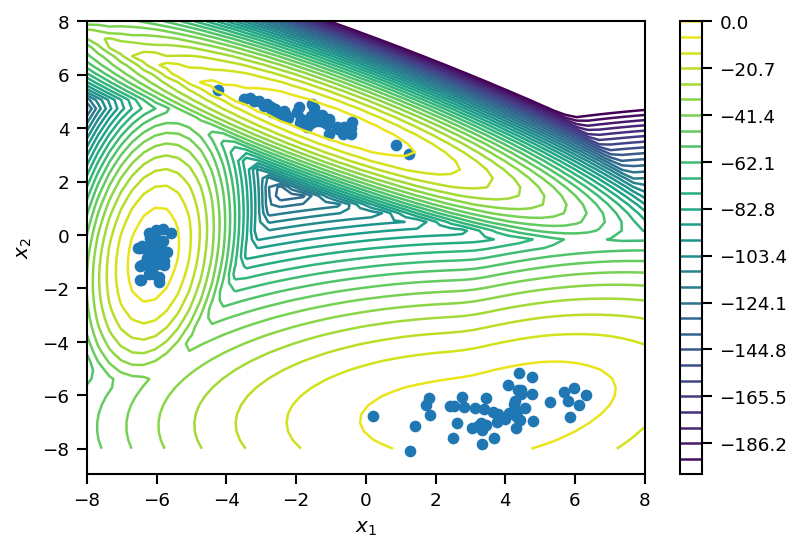

In [85]:
# Trying fewer components
model = GaussianMixture(n_components=5).fit(data)
x = np.linspace(-8., 8.)
y = np.linspace(-8., 8.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = model.score_samples(XX)
Z = Z.reshape(X.shape)

fig, ax = plt.subplots(dpi=150)
c = ax.contour(X, Y, Z, levels=np.linspace(-200, 0.0, 30))
plt.colorbar(c)
plt.scatter(data[:, 0], data[:, 1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

Text(0, 0.5, '$x_2$')

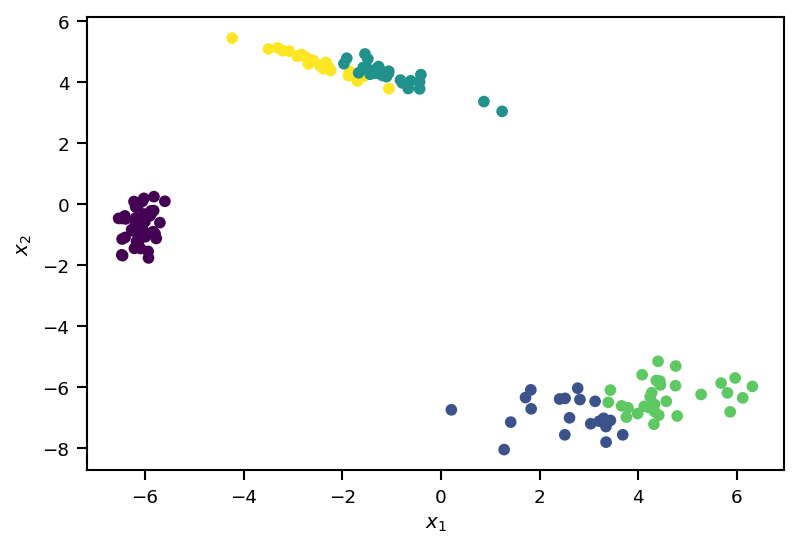

In [86]:
# Clustering with this model
labels = model.predict(data)
fig, ax = plt.subplots(dpi=150)
plt.scatter(data[:, 0], data[:, 1], c=labels)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

In [96]:
# Train with different number of components and estimate BIC
bics = []
models = []
for nc in range(1, 10):
    m = GaussianMixture(n_components=nc).fit(data)
    bics.append(m.bic(data))
    models.append(m)
bics = np.array(bics)

Text(0.5, 0, 'Number of components')

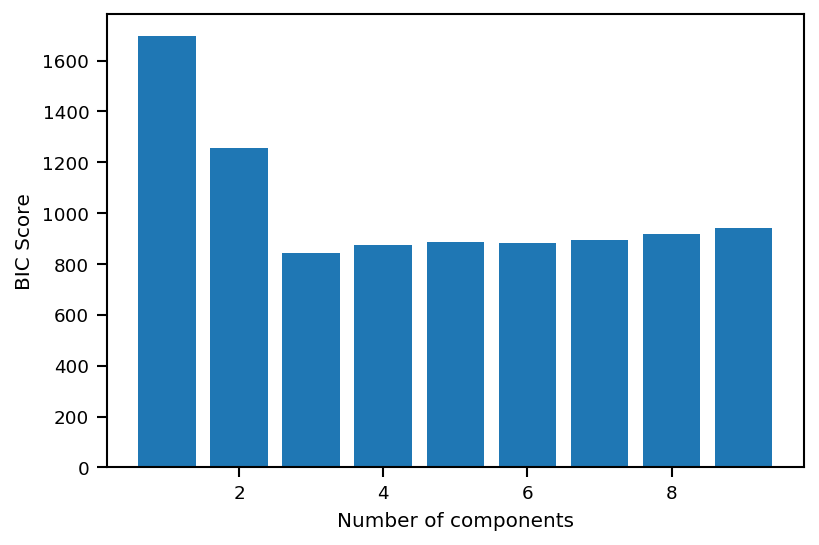

In [100]:
fig, ax = plt.subplots(dpi=150)
ax.bar(range(1, 10), bics)
ax.set_ylabel('BIC Score')
ax.set_xlabel('Number of components')

Text(0.5, 0, 'Number of components')

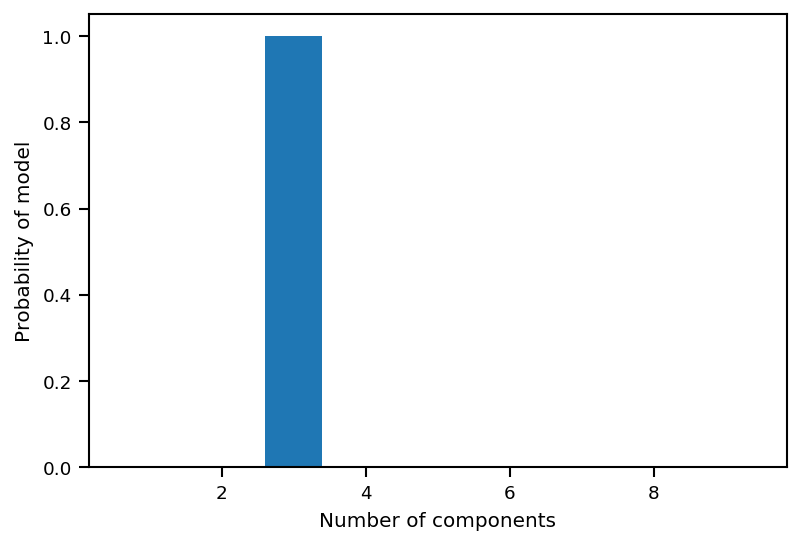

In [103]:
prob_M = np.exp(-0.5 * bics)
prob_M /= np.sum(prob_M)
fig, ax = plt.subplots(dpi=150)
ax.bar(range(1, 10), prob_M)
ax.set_ylabel('Probability of model')
ax.set_xlabel('Number of components')

In [104]:
# Make synthetic dataset for clustering
num_clusters_true = 3
# The means of each cluster
mu_true = 5.0 * np.random.randn(num_clusters_true, 2)
# The variance of the observations around the cluster
# Covariance of each cluster
Sigmas = []
for i in range(num_clusters_true):
    u = 2 * np.random.randn(2, 1)
    v = 2 * np.random.randn(2, 1)
    Sigma = np.dot(u, u.T) + np.dot(v, v.T)
    Sigmas.append(Sigma)
# How many observations to generate per cluster
num_obs_cluster = [50, 50, 50]
#num_obs_cluster = [50] * num_clusters_true
# Generate the data
data = []
for i in range(num_clusters_true):
    x_i = np.random.multivariate_normal(mu_true[i], Sigmas[i], 
                                        size=num_obs_cluster[i])
    data.append(x_i)
data = np.vstack(data)
# Permute the data so that order info is lost
data = np.random.permutation(data)

Text(0, 0.5, '$x_2$')

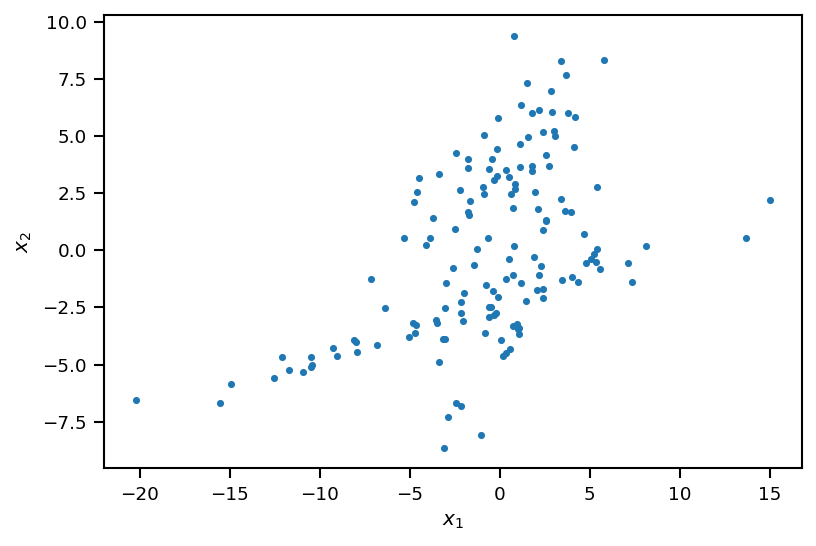

In [105]:
fig, ax = plt.subplots(dpi=150)
ax.plot(data[:, 0], data[:, 1], '.')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

In [106]:
# Train with different number of components and estimate BIC
bics = []
models = []
for nc in range(1, 10):
    m = GaussianMixture(n_components=nc).fit(data)
    bics.append(m.bic(data))
    models.append(m)
bics = np.array(bics)

Text(0.5, 0, 'Number of components')

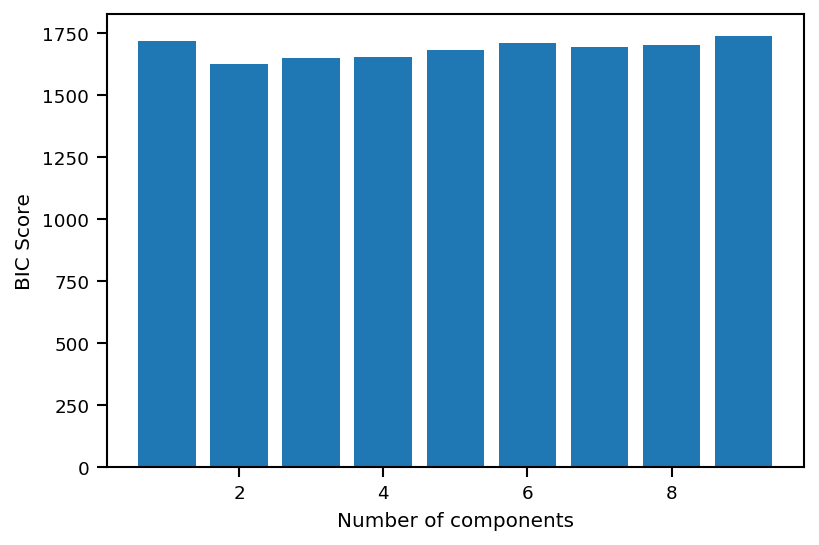

In [107]:
fig, ax = plt.subplots(dpi=150)
ax.bar(range(1, 10), bics)
ax.set_ylabel('BIC Score')
ax.set_xlabel('Number of components')

Text(0.5, 0, 'Number of components')

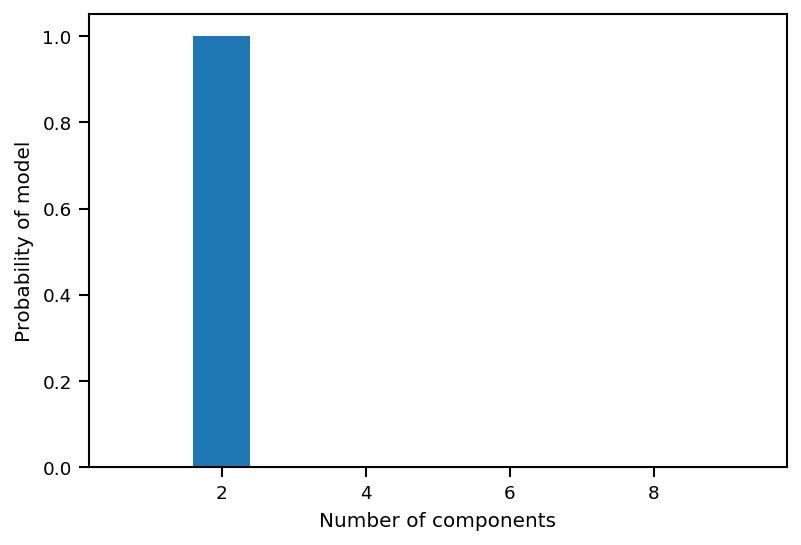

In [119]:
from scipy.special import logsumexp
log_prob_M = -0.5 * bics
log_prob_M -= logsumexp(-0.5 * bics)
prob_M = np.exp(log_prob_M)
fig, ax = plt.subplots(dpi=150)
ax.bar(range(1, 10), prob_M)
ax.set_ylabel('Probability of model')
ax.set_xlabel('Number of components')

Text(0, 0.5, '$x_2$')

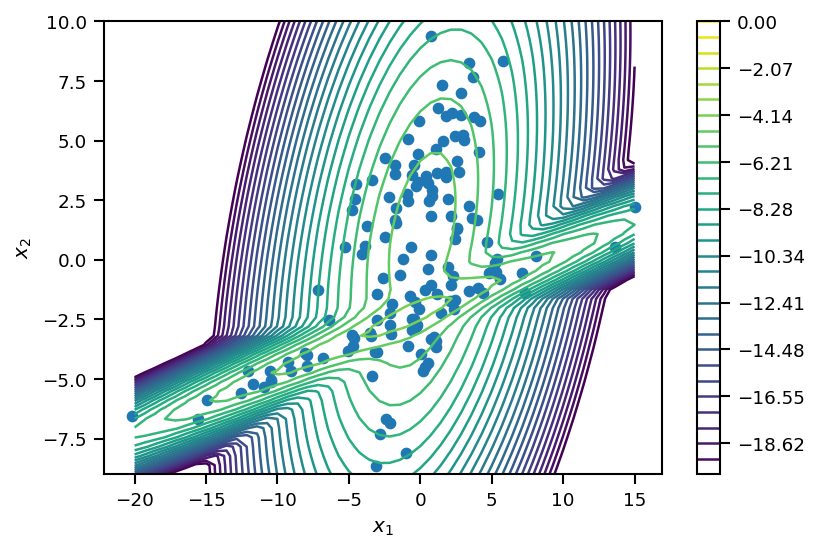

In [127]:
# Trying fewer components
x = np.linspace(-20., 15.)
y = np.linspace(-9., 10.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = models[1].score_samples(XX)
Z = Z.reshape(X.shape)

fig, ax = plt.subplots(dpi=150)
c = ax.contour(X, Y, Z, levels=np.linspace(-20, -0, 30)) 
plt.colorbar(c)
plt.scatter(data[:, 0], data[:, 1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

Text(0, 0.5, '$x_2$')

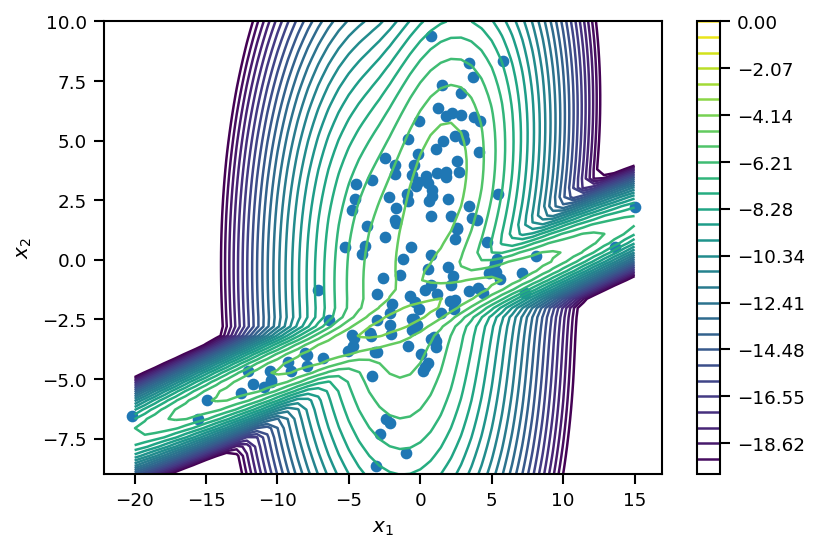

In [128]:
# Trying fewer components
x = np.linspace(-20., 15.)
y = np.linspace(-9., 10.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = models[2].score_samples(XX)
Z = Z.reshape(X.shape)

fig, ax = plt.subplots(dpi=150)
c = ax.contour(X, Y, Z, levels=np.linspace(-20, -0, 30)) 
plt.colorbar(c)
plt.scatter(data[:, 0], data[:, 1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')